# Predicting APPLE Stock Price

- Collect and Import Data
- Data Cleaning and Preprocessing
- Candlestick Chart
- Logarithmic Scales for Plottiing Price Differences

- 短期交易策略
- 股票长期趋势预测
- 时间序列建模


## Use Pandas Datareader to import data

In [1]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
%matplotlib inline

plt.style.use('seaborn-whitegrid')


import warnings
warnings.filterwarnings('ignore')

/Users/li/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
end = datetime.datetime.now()
start = end - 50 * datetime.timedelta(days=365)  # 50 years ago, covering all stock information

In [3]:
df = web.DataReader("AAPL", 'yahoo',start=start, end=end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,0.515625,0.513393,0.513393,0.513393,117258400.0,0.405683
1980-12-15,0.488839,0.486607,0.488839,0.486607,43971200.0,0.384517
1980-12-16,0.453125,0.450893,0.453125,0.450893,26432000.0,0.356296
1980-12-17,0.464286,0.462054,0.462054,0.462054,21610400.0,0.365115
1980-12-18,0.477679,0.475446,0.475446,0.475446,18362400.0,0.375698


In [4]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-30,365.980011,360.000000,360.079987,364.799988,35055800.0,364.799988
2020-07-01,367.359985,363.910004,365.119995,364.109985,27684300.0,364.109985
2020-07-02,370.470001,363.640015,367.850006,364.109985,28510400.0,364.109985
2020-07-06,375.779999,369.869995,370.000000,373.850006,29591100.0,373.850006
2020-07-07,378.619995,372.230011,375.410004,372.690002,26491899.0,372.690002


In [5]:
df.isnull().values.sum()   #no missing values

0

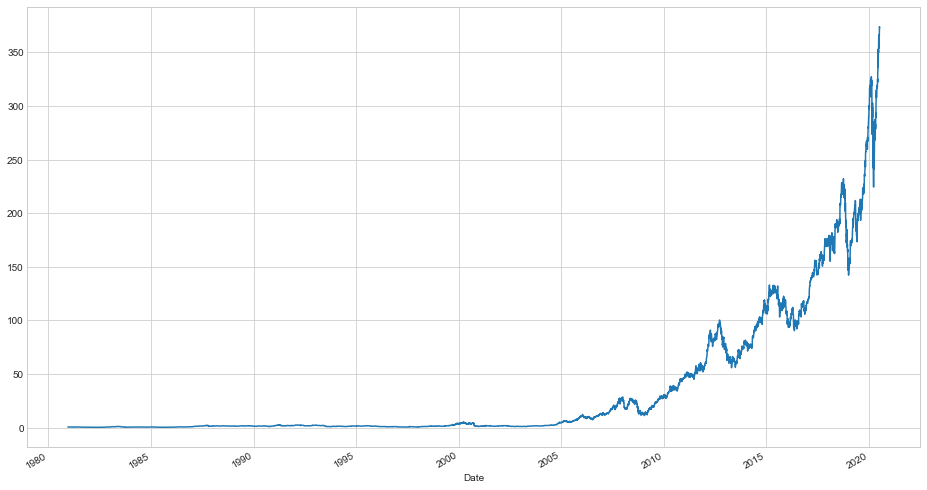

In [6]:
close = df.Close
close.plot(figsize=(16, 9))

## Candlestick Chart/Stock K Chart

A candlestick chart is a style of financial chart used to describe price movements. Each "candlestick" typically shows one day, thus a one-month chart may show the 20 trading days as 20 candlesticks.Candlestick charts can also be built using intervals shorter or longer than one day.

Each candlestick represents all four important pieces of information for that day: open and close in the thick body; high and low in the “candle wick”. Being densely packed with information, it tends to represent trading patterns over short periods of time, often a few days or a few trading sessions.

In [7]:
from mpl_finance import candlestick2_ohlc

/Users/li/anaconda3/lib/python3.7/site-packages/mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


Text(0.5, 1.0, 'APPL Stock Candlestick Chart Jan-Mar 2020')

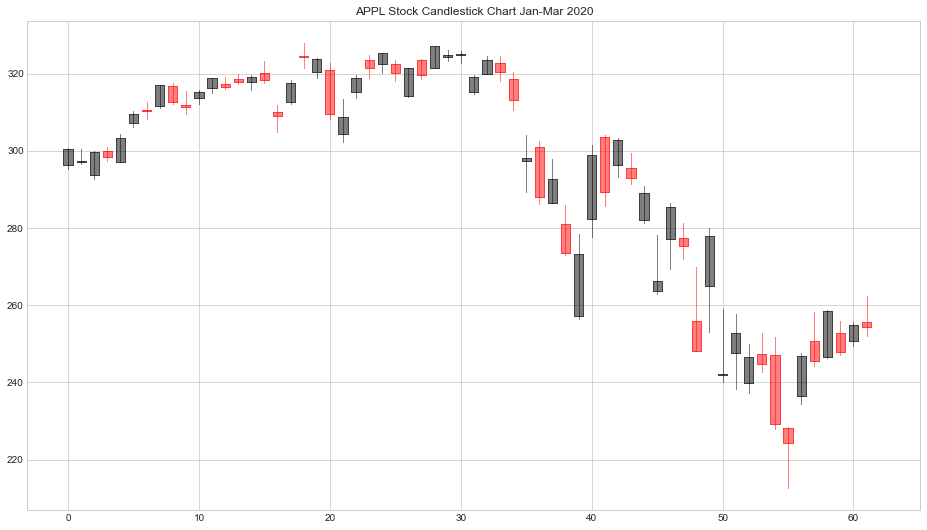

In [8]:
year_2020_1_3 = df['2020-01':'2020-03']  # plot candlestick from Jan 2020 to Mar 2020

fig, ax = plt.subplots(figsize=(16, 9))
candlestick2_ohlc(ax, year_2020_1_3.Open, year_2020_1_3.High,
                  year_2020_1_3.Low, year_2020_1_3.Close, width=.7, alpha=.5)
plt.title('APPL Stock Candlestick Chart Jan-Mar 2020')

The candlestick chart shows trend of stock price changes. The bigger a red block, the greater price increase on that particular day.

## Logarithmic Scales for Price Difference Plotting

Canclestick plot reflects stock price change in one day. To compare prices in pairing days, we need to plot the price difference beteen T1 and T1-1. I'll use 2019 and 2020 data to plot the price changes over time.

- Logarithmic price scales are a type of scale used on a chart, plotted such that two equivalent price changes are - represented by the same vertical changes on the scale.
- They are generally used for long-term perspective analysis of price changes.
- They differ from linear price scales because they display percentage points and not dollar price increases for a stock.

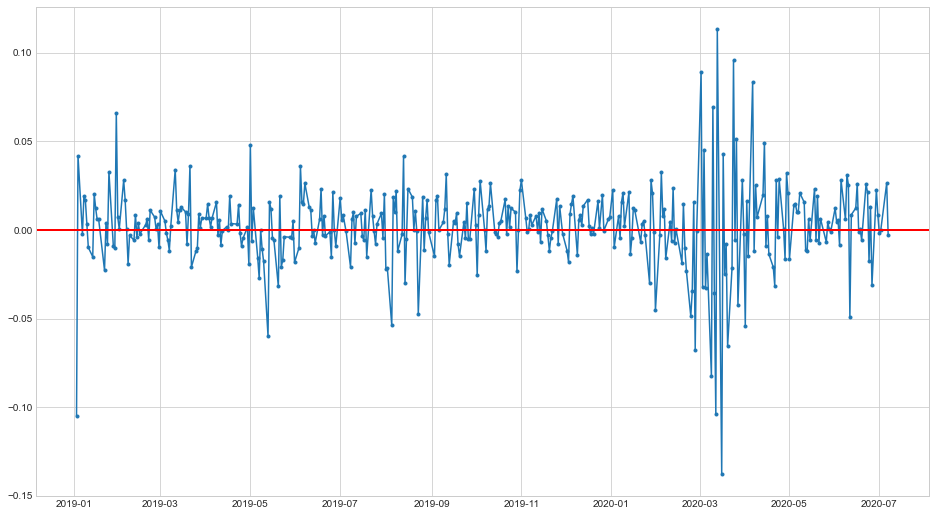

In [9]:
import numpy as np

year_2019 = df['2019-01':]
year_2019_close = year_2019.Close

log_change = np.log(year_2019_close) - np.log(year_2019_close.shift(1))

fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(log_change, ".-")
ax.axhline(y=0, color='red', lw=2)

Above the red baseline means price rise and below means price drops.

In [10]:
(log_change < 0).sum() / len(log_change) #proportion of drop

0.4330708661417323

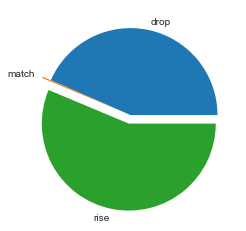

In [11]:
labels = 'drop', 'match', 'rise'  
sizes = [(log_change < 0).sum(), (log_change ==
                                  0).sum(), (log_change > 0).sum()]
explode = (0, 0.1, 0.1)

plt.pie(x=sizes, labels=labels, explode=explode)
plt.show()

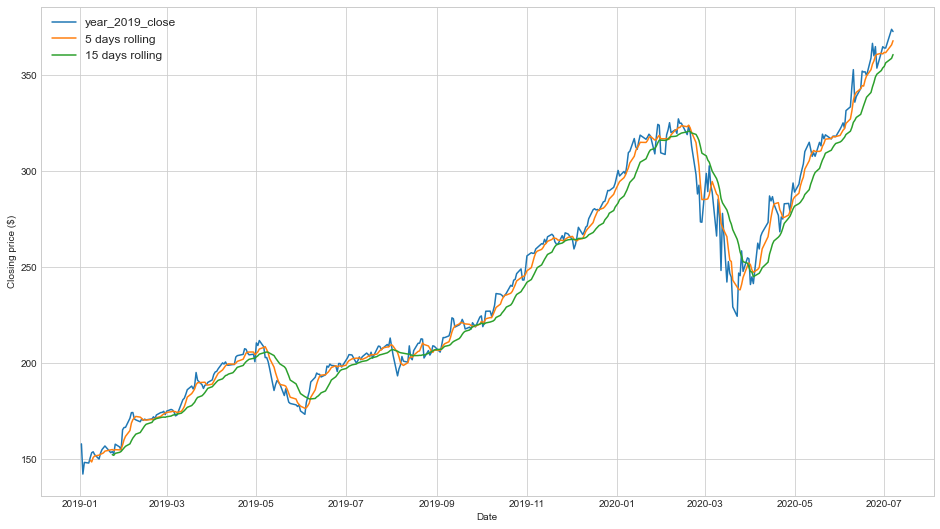

In [12]:
short_rolling = year_2019_close.rolling(window=5).mean()  # moving average for a window of 5
long_rolling = year_2019_close.rolling(window=15).mean()

fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(year_2019_close.index, year_2019_close, label='year_2019_close')
ax.plot(short_rolling.index, short_rolling, label='5 days rolling')
ax.plot(long_rolling.index, long_rolling, label='15 days rolling')
ax.set_xlabel('Date')
ax.set_ylabel('Closing price ($)')
ax.legend(fontsize='large')

## Short-term Trading Strategy

The graph shows that with a window of 15, the changes are smoother than that of window 5. It shows less severe price increases or decreases.

We can create a short-term trading strategy based on the intersections of long-term(window=15) and short-term(window=5) curves in the above plot.


 - When short-term curve meets long-term curve from above, then we expect drop in price, and sell our stock.
 - When short-term curve meets long-term curve from below, then we expect an increase, therefore we choose to buy.


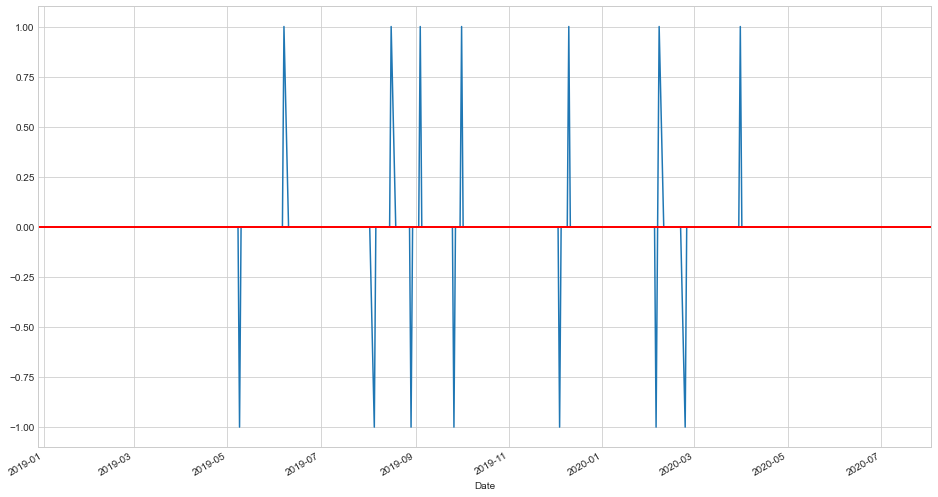

In [13]:
fig, ax = plt.subplots(figsize=(16, 9))

short_long = np.sign(short_rolling - long_rolling)  # np.sign returns an element-wise indication of the sign of a number.
buy_sell = np.sign(short_long - short_long.shift(1))
buy_sell.plot(ax=ax)
ax.axhline(y=0, color='red', lw=2)

In [14]:
buy_sell[buy_sell == 1] #buy point

Date
2019-06-07    1.0
2019-08-16    1.0
2019-09-04    1.0
2019-10-01    1.0
2019-12-10    1.0
2020-02-07    1.0
2020-03-31    1.0
Name: Close, dtype: float64

In [15]:
buy_sell[buy_sell == -1] #sell point

Date
2019-05-09   -1.0
2019-08-05   -1.0
2019-08-29   -1.0
2019-09-26   -1.0
2019-12-04   -1.0
2020-02-05   -1.0
2020-02-24   -1.0
Name: Close, dtype: float64

If we buy Apple stock at 2019-08-16 and later sell on 2019-08-29, the overall returns will be：

In [16]:
year_2019_close['2019-12-04'] - year_2019_close['2019-08-16']

55.239990234375

This short-term trading approach is based on historic data, we can't do predictions. 

## Long-term Prediction

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

Prophet is open source software released by Facebook's Core Data Science team .

Full documentation and examples available at the homepage: https://facebook.github.io/prophet/

Prophet requires the date column to be named ds and the feature column to be named y, so we make the appropriate changes.

In [17]:
data = df["2000":]  # we will use data after year 2000
data = data['Close'].reset_index()
data = data.rename(columns={'Date': 'ds', 'Close': 'y'})
data.head()

,ds,y
0,2000-01-03,3.997768
1,2000-01-04,3.660714
2,2000-01-05,3.714286
3,2000-01-06,3.392857
4,2000-01-07,3.553571


### Time Series Modeling

Bias and variance are two very important indicators in machine learning. Overfitting comes with great variance while underfitting leads to high variance.

Prophet follows the norms of scikit-learn using fit() and predict(). changepoint_prior_scale is a measure of how sensitive the model is to the change. The higher value, the more sensitive to changes. It's a regularization parameter to balance the bias-bariance trade-off.


If the trend changes are being overfit (too much flexibility) or underfit (not enough flexibility), we can adjust the strength of the sparse prior using the input argument changepoint_prior_scale. By default, this parameter is set to 0.05. Increasing it will make the trend more flexible.

In [20]:
#!pip install fbprophet

In [21]:
import pystan
model_code = 'parameters {real y;} model {y ~ normal(0,1);}'
model = pystan.StanModel(model_code=model_code)  # this will take a minute
y = model.sampling(n_jobs=1).extract()['y']
y.mean()  # should be close to 0

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5944b02c79788fa0db5b3a93728ca2bf NOW.


CompileError: command 'gcc' failed with exit status 1

In [22]:
import fbprophet

model = fbprophet.Prophet(changepoint_prior_scale=0.05, #using default prior scale
                          daily_seasonality=True)  # define the model
model.fit(data)  # train model

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
model.history

In [ ]:
forecast_df = model.make_future_dataframe(periods=365, freq='D')  #build the time series
forecast = model.predict(forecast_df)  # model prediction

In [ ]:
model.plot(forecast, xlabel='Date', ylabel='Close Price $')  # plotting predictions
plt.title('Close Price of AAPL')

#### Plotting using different values of changepoint_prior_scale parameter (0.01, 0.05, 0.1)

In [ ]:
def plot(m, fcst, ax=None, uncertainty=True, plot_cap=True, xlabel='ds',
         ylabel='y', plot_color='#0072B2'):
    """Plot the Prophet forecast.
    Parameters
    ----------
    m: Prophet model.
    fcst: pd.DataFrame output of m.predict.
    ax: Optional matplotlib axes on which to plot.
    uncertainty: Optional boolean to plot uncertainty intervals.
    plot_cap: Optional boolean indicating if the capacity should be shown
        in the figure, if available.
    xlabel: Optional label name on X-axis
    ylabel: Optional label name on Y-axis
    Returns
    -------
    A matplotlib figure.
    """
    if ax is None:
        fig = plt.figure(facecolor='w', figsize=(10, 6))
        ax = fig.add_subplot(111)
    else:
        fig = ax.get_figure()
    fcst_t = fcst['ds'].dt.to_pydatetime() # to_pydatetime returns the data as an array of native Python datetime objects.
    ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.')
    ax.plot(fcst_t, fcst['yhat'], ls='-', c=plot_color)
    if 'cap' in fcst and plot_cap:
        ax.plot(fcst_t, fcst['cap'], ls='--', c='k')
    if m.logistic_floor and 'floor' in fcst and plot_cap:
        ax.plot(fcst_t, fcst['floor'], ls='--', c='k')
    if uncertainty:
        ax.fill_between(fcst_t, fcst['yhat_lower'], fcst['yhat_upper'],
                        color=plot_color, alpha=0.2)
    ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    fig.tight_layout()
    return fig

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))

for point, color in zip([0.01, 0.05, 0.1], ['blue', 'red', 'yellow']):
    temp_model = fbprophet.Prophet(
        changepoint_prior_scale=point, daily_seasonality=True)
    temp_model.fit(data)
    forecast = temp_model.make_future_dataframe(periods=365*2, freq='D')  # 2 年
    forecast = temp_model.predict(forecast)
    plot(temp_model, forecast, ax=ax, xlabel='Date',
         ylabel='Close Price ¥', plot_color=color)

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

fig = model.plot(forecast)  
a = add_changepoints_to_plot(fig.gca(), model, forecast)  # add changepoints

In [ ]:
from fbprophet.plot import plot_components

model.plot_components(forecast)  # multi-dimensions
